# Compiti delle Vacanze di Natale di Informatica – Soluzioni in Python 


## Esercizio 1 — Progressione aritmetica (uso di una Classe)

Progressione aritmetica definita da:
- primo termine `a0`
- ragione `r`

Formule:
- termine di indice `n`: **a(n) = a0 + n·r**
- somma dei primi `n` termini (da indice 0 a n−1): **S(n) = n/2 · (2a0 + (n−1)r)**

La classe mantiene uno stato interno per produrre i termini in sequenza con `successivo()` e ripartire con `reset()`.

**Esempio del testo:** `a0 = 3`, `r = 2` → **3, 5, 7, 9, 11, ...**  
Somma dei primi 4 termini: **3+5+7+9 = 24**


In [ ]:
class ProgressioneAritmetica:
    def __init__(self, a0, r):
        self.a0 = a0
        self.r = r
        self._indice = 0
        self._corrente = self.a0
        self.reset()

    def termine(self, n):
        # Si ipotizza n >= 0
        return self.a0 + n * self.r

    def somma(self, n):
        # Somma dei primi n termini 
        if n == 0: # Se n è uguale a 0, la somma è chiaramente 0
            return 0
        return (n / 2) * (2 * self.a0 + (n - 1) * self.r)

    def successivo(self):
        valore = self._corrente
        self._indice = self._indice + 1
        self._corrente = self.a0 + self._indice * self.r
        return valore

    def reset(self):
        self._indice = 0
        self._corrente = self.a0


# ESEMPIO (a0=3, r=2)
p = ProgressioneAritmetica(3, 2)

print("termine(0) =", p.termine(0))
print("termine(1) =", p.termine(1))
print("termine(4) =", p.termine(4))

print("somma(4)   =", p.somma(4), "(= 3+5+7+9)")

print("successivo:", p.successivo())  # 3
print("successivo:", p.successivo())  # 5

p.reset()
print("dopo reset:", p.successivo())  # 3


## Esercizio 2 — Somma dei divisori positivi

Scrivere `somma_divisori(n)` che restituisce la somma di **tutti** i divisori positivi di `n` (inclusi 1 e n).

Soluzione: provare **tutti** i numeri da 1 a n e sommare quelli che dividono n.

**Esempio del testo:** per `n = 12` i divisori sono  
**1, 2, 3, 4, 6, 12** e la somma è **28**.


In [ ]:
def somma_divisori(n):
    s = 0
    for i in range(1, n + 1):
        if n % i == 0:
            s = s + i
    return s


# ESEMPIO (n=12)
somma = somma_divisori(12)
print(somma)  # 28


## Esercizio 3 — Conta coppie (a, b) con MCD = 1

Scrivere `conta_coppie_coprime(N)` che conta quante coppie **ordinate** (a, b), con  
`1 ≤ a ≤ N` e `1 ≤ b ≤ N`, soddisfano `MCD(a, b) = 1`.

Implementiamo `mcd(a,b)` con l’algoritmo di Euclide.
Per rispettare il vincolo “solo `for`”, facciamo Euclide usando un `for` con un numero massimo di passi sufficiente.

**Esempio del testo:** per `N = 3` le coppie coprime sono 7:  
(1,1) (1,2) (1,3) (2,1) (2,3) (3,1) (3,2) → **7**


In [ ]:
def mcd(a, b):
    # Algoritmo di Euclide:
    # ripetiamo al massimo un numero di volte sufficiente (a e b diminuiscono rapidamente).
    # Per sicurezza: massimo a+b passi.
    for i in range(0, a + b): # i da 0 a a+b-1
        if b != 0:
            resto = a % b # calcolo il resto
            a = b # aggiorno a
            b = resto # aggiorno b
        else:
            return a
    return a

def conta_coppie_coprime(N):
    count = 0
    for a in range(1, N + 1):
        for b in range(1, N + 1):
            if mcd(a, b) == 1:
                count = count + 1
    return count

# ESEMPIO (N=3)
print(conta_coppie_coprime(3))  # 7
# Le coppie coprime sono (1,1), (1,2), (1,3), (2,1), (2,3), (3,1), (3,2)

# ESEMPIO (N=8)
print(conta_coppie_coprime(8))  # 43


## Esercizio 4 — Approssimazione di π con la serie di Leibniz

Serie di Leibniz:
**π ≈ 4·(1 − 1/3 + 1/5 − 1/7 + ...)**

Scrivere `pi_leibniz(k)` che usa **esattamente k termini**.

**Esempio del testo:**
- `k = 1` → **4**
- `k = 2` → **4·(1 − 1/3) = 8/3 ≈ 2.6666...**


In [ ]:
def pi_leibniz(k):
    s = 0.0
    for i in range(0, k): # i da 0 a k-1
        denominatore = 2 * i + 1
        termine = 1.0 / denominatore # termine i-esimo
        if i % 2 == 0: # i pari: somma
            s = s + termine
        else: # i dispari: sottrazione
            s = s - termine
    return 4.0 * s # valore approssimato di pi greco


# ESEMPIO (k=1 e k=2)
print("k=1:", pi_leibniz(1))          # 4
print("k=2:", pi_leibniz(2))          # 2.6666...

print("k=1000000:", pi_leibniz(6))
print("k=1000000:", pi_leibniz(8))
print("k=1000000:", pi_leibniz(9))
print("k=1000000:", pi_leibniz(10))
print("k=1000000:", pi_leibniz(11))

print("k=1000000:", pi_leibniz(100))

print("k=1000000:", pi_leibniz(1000000))  # circa 3.14159


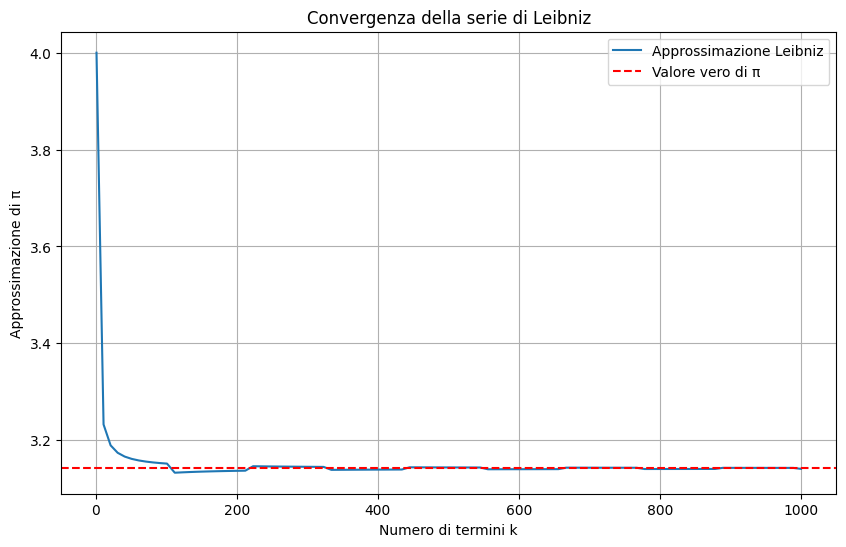

In [17]:
# Codici da eseguire dopo l'esecuzione della funzione precedente.
import numpy as np

import matplotlib.pyplot as plt

# Crea un array di valori k da 1 a 1000 con 100 punti
k_values = np.linspace(1, 1000, 100, dtype=int) # Valori di k

# Calcola l'approssimazione di pi per ciascun k
approximations = [] # Lista delle approssimazioni

for k in k_values:
    approximations.append(pi_leibniz(k))

# Crea il grafico
plt.figure(figsize=(10, 6)) # Imposta la dimensione della figura
plt.plot(k_values, approximations, label='Approssimazione Leibniz') # Traccia la linea dell'approssimazione
plt.axhline(y=np.pi, color='red', linestyle='--', label='Valore vero di π') # Linea orizzontale per il valore vero di π
plt.xlabel('Numero di termini k') # Etichetta asse x
plt.ylabel('Approssimazione di π') # Etichetta asse y
plt.title('Convergenza della serie di Leibniz') # Titolo del grafico
plt.legend() # Mostra la legenda
plt.grid(True) # Aggiungi una griglia
plt.show() # Mostra il grafico

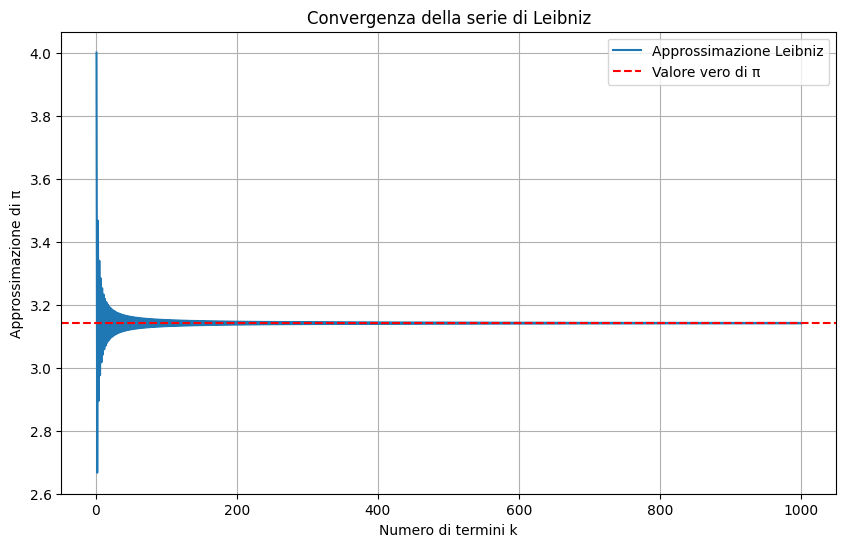

In [16]:
# Codici da eseguire dopo l'esecuzione della funzione precedente.
import numpy as np

import matplotlib.pyplot as plt

# Crea un array di valori k da 1 a 1000 con 1000 punti
k_values = np.linspace(1, 1000, 1000, dtype=int) # Valori di k

# Calcola l'approssimazione di pi per ciascun k
approximations = [] # Lista delle approssimazioni

for k in k_values:
    approximations.append(pi_leibniz(k))

# Crea il grafico
plt.figure(figsize=(10, 6)) # Imposta la dimensione della figura
plt.plot(k_values, approximations, label='Approssimazione Leibniz') # Traccia la linea dell'approssimazione
plt.axhline(y=np.pi, color='red', linestyle='--', label='Valore vero di π') # Linea orizzontale per il valore vero di π
plt.xlabel('Numero di termini k') # Etichetta asse x
plt.ylabel('Approssimazione di π') # Etichetta asse y
plt.title('Convergenza della serie di Leibniz') # Titolo del grafico
plt.legend() # Mostra la legenda
plt.grid(True) # Aggiungi una griglia
plt.show() # Mostra il grafico